사용 할 데이터는 캐글에서 price를 검색하면 나오는 Laptop Price 예측용 데이터

이 데이터를 고른 이유는 다음과 같음.

1. 가격이라는 타겟은 매우 직관적이고 결과를 분석하기 쉬움. 따라서 가격을 키워드로 검색함.
2. 여러 price 데이터 중 노트북 가격 데이터를 선택한 이유는 본인이 부동산, 주식, 스포츠 같은 다른 분야보다는 컴퓨터 쪽에 배경지식이 더 많기 때문

# 1. EDA

## 1. 데이터 불러오기

기초 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터 로드

In [ ]:
df = pd.read_csv('laptop_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


- 1303개의 적은 수의 데이터. 결측치가 없고 범주형 컬럼이 많음.

데이터의 형태 확인

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

각 컬럼의 의미

1. Company- String -Laptop Manufacturer
2. Product -String -Brand and Model
3. TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
4. Inches -Numeric- Screen Size
5. ScreenResolution -String- Screen Resolution
6. Cpu- String -Central Processing Unit (CPU)
7. Ram -String- Laptop RAM
8. Memory -String- Hard Disk / SSD Memory
9. GPU -String- Graphics Processing Units (GPU)
10. OpSys -String- Operating System
11. Weight -String- Laptop Weight
12. Price_euros -Numeric- Price (Euro)

- ram, memory, weight는 연속형 데이터로 변환 가능.
- product, cpu, gpu 등의 지나치게 많은 종류의 값을 가진 범주형 데이터들은 따로 분석이 필요함.

## 2. 타겟 EDA

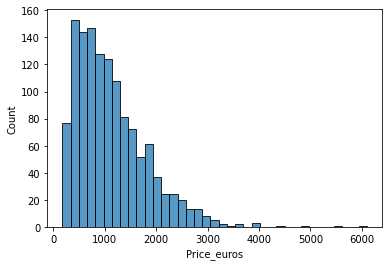

In [ ]:
sns.histplot(df['Price_euros'])

- 왼쪽으로 치우친 그래프. 분포 조정이 필요
- 추후 numpy.log1p, numpy.expm1 함수와 TransformedTargetRegressor 라이브러리를 사용하겠음.

우측 꼬리의 값은 이상치인가?

In [ ]:
df[df['Price_euros'] > 5000]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
196,200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0
830,839,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,5499.0


- 실제로도 매우 비싼 게이밍 노트북임. 일단 제거하지 않고 포함시키겠음.

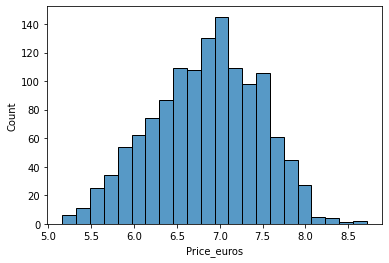

In [ ]:
sns.histplot(np.log1p(df['Price_euros']))

- 로그 변환을 한 타겟은 위와 같은 분포가 될 것임

## 3. 특성 EDA

### 1. 전체적인 구성 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


범주형 데이터 - Company, TypeName, OpSys, Ram, Memory

특성공학이 필요한 범주형 데이터 - Product, ScreenResolution, Cpu, Gpu

연속형 데이터 - Inches, Weight

### 2. 데이터 분포 확인

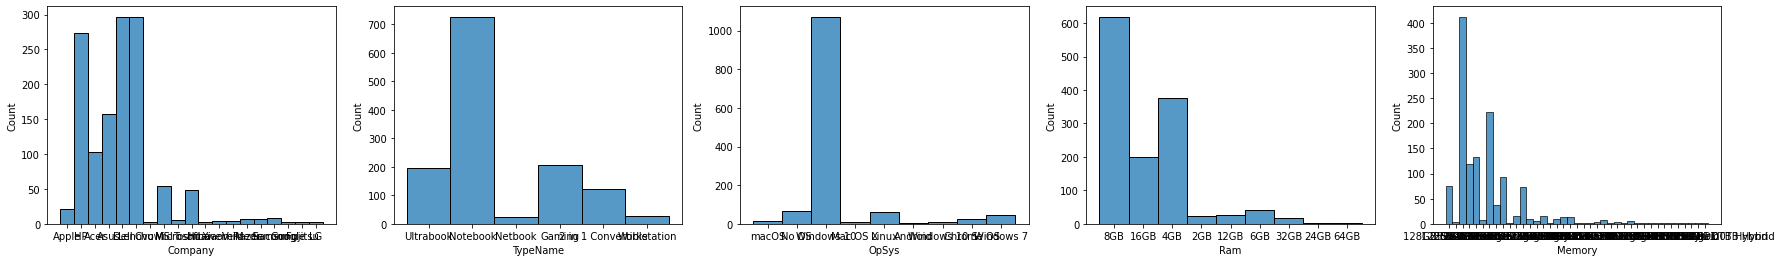

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(30,4))


sns.histplot(df['Company'], ax=ax[0])
sns.histplot(df['TypeName'], ax=ax[1])
sns.histplot(df['OpSys'], ax=ax[2])
sns.histplot(df['Ram'], ax=ax[3])
sns.histplot(df['Memory'], ax=ax[4])

데이터의 분포가 매우 불균형함을 알 수 있다. 

이 상태로 train과 test 데이터를 나누면 범주가 누락되는 문제가 생길 수 있다.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=11)

df['Company'].nunique(), train['Company'].nunique(), test['Company'].nunique()

(19, 18, 16)

아래의 데이터는 test 데이터에는 존재하지만, train 데이터에는 존재하지 않는 값을 setdiff1d 함수로 구한 것이다.

In [ ]:
np.setdiff1d(test['Company'].unique(), train['Company'].unique())

array(['Google'], dtype=object)

test 데이터의 범주가 누락되는 것은 크게 상관이 없으나, 위와 같이 train 데이터의 범주가 모집합과 다르면 test 데이터에는 존재하는 값이 train 데이터에는 존재하지 않는 경우가 생긴다.

이는 과소적합의 일종이라 볼 수 있지 않을까?

이 문제를 해결할 근본적인 방법은 데이터의 관측치 수를 늘리는 것이지만, 타겟이 출고가 기준인지, 어느 시점의 가격 기준인지도 모르는 상황에서 다른 데이터를 함부로 삽입할 수는 없다.

따라서 한정된 자료를 가지고 문제를 극복해야 한다.

내가 생각한 해결 방안은 다음과 같다.

1. 범주형 특성들이 최대한 많이 묶이도록 전처리를 수행한다.

2. 모집합의 범주와 train 데이터의 범주가 같도록 샘플링 한다.

첫번째 방법은 나중에 특성 공학 파트에서 진행 할 것이다.

두번째 방법을 위해서 아래의 함수를 만들었다.

In [ ]:
def setdiff2d(df, train) :
    rst = []
    for col in df :
        if df[col].dtype != 'object' : continue
        rst.append(np.setdiff1d(df[col].unique(), train[col].unique()))
    return rst

setdiff1d 함수는 1차원 배열만 반환하므로 불편하다. 전처리 단계에서 데이터의 형변환이 올바르게 진행되었다면 범주형 데이터는 문자형일 것이다.

위 함수는 컬럼이 문자형인 경우 train 데이터에서 범주가 얼마나 누락되었는지 나타내는 리스트를 반환한다.

리스트가 비어있다면 누락된 값 없이 올바르게 샘플링 된 것이다.

In [ ]:
setdiff2d(df, train)

[array(['Google'], dtype=object), array(['15-AY023na (N3710/8GB/2TB/W10)',
        '15-BS103nv (i5-8250U/6GB/256GB/Radeon', 'Aspire 1',
        'Aspire A715-71G', 'Aspire VX5-591G',
        'B51-80 (i5-6200U/8GB/1008GB/Radeon',
        'C740-C9QX (3205U/2GB/32GB/Chrome', 'Chromebook 13',
        'Chromebook C202SA', 'Chromebook C731-C78G',
        'E402WA-GA007T (E2-6110/4GB/64GB/W10',
        'E402WA-GA010T (E2-6110/2GB/32GB/W10)', 'EliteBook 1030',
        'Elitebook 1040', 'Envy 13-AB077cl',
        'FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce', 'GP72MVR 7RFX',
        'GS60 Ghost', 'GS73VR 7RF', 'GT80S 6QF-074US', 'Gram 14Z970',
        'Gram 15Z970', 'IdeaPad 320-17ISK', 'IdeaPad 520s-14IKB',
        'IdeaPad Y910-17ISK', 'Ideapad 320-15IAP', 'Ideapad 510S-13IKB',
        'Inspiron 3168', 'K556UR-DM621T (i7-7500U/8GB/256GB/GeForce',
        'L502NA-GO052T (N3350/4GB/128GB/W10)', 'Lapbook 15,6',
        'Lenovo IdeaPad', 'LifeBook A556', 'Nitro AN515-51',
        'Omen 15-ce006nv', '

Product 행은 데이터가 너무 파편화 되어 있다.

특성 공학 단계에서 보다 의미 있는 단위로 묶을 것이다.

### 3. 각각의 특성 분석

laptop_ID : 예측에 필요 없는 인덱스 컬럼이므로 삭제

Company : 올바른 범주형 데이터

Product : 모델명이 너무 다양하므로, 브랜드명으로 묶기

TypeName : 올바른 범주형 데이터

Inches : 올바른 연속형 데이터

ScreenResolution : 패널의 종류와 적용된 기술, 해상도 등으로 나누기

Cpu : i5, i7 등은 가격대를, 2.3GHz 등은 성능을 나타내는데, cpu의 성능은 시간이 지나면 기술이 발전해 높아지지만 출시 당시 가격은 변하지 않으므로 가격대별로 다시 묶어줄 필요가 있음.

Gpu : cpu와 비슷한 작업 필요

Ram : 숫자로 형변환(순서있는 범주형)

Memory : 보조 메모리 종류와 저장 용량으로 나누기

OpSys : 올바른 범주형 데이터

Weight : 숫자로 형변환(연속형)

# 2. 데이터 전처리

In [ ]:
df_bp.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [ ]:
df.nunique()

Company         18
TypeName         6
Inches          18
Cpu             17
Ram              9
Gpu             21
OpSys            9
Weight         171
Price_euros    791
Brand           55
Touchscreen      2
ScreenX         13
ScreenY         10
SSD             12
HDD              6
Hybrid           3
Flash            7
dtype: int64

## 1. Product

### 1. 패턴 찾기

In [ ]:
df['Product'].nunique()

618

- 데이터가 너무 많아서 이대로 사용 할 수 없음

In [ ]:
df['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

- 공백을 기준으로 좌측은 브랜드명, 우측은 모델명인 경우가 많은 듯

### 2. Brand 컬럼 생성

In [ ]:
# df 백업
df_bp = df.copy()

In [ ]:
# 공백을 기준으로 나누기
df['Brand'] = df['Product'].apply(lambda x: x.split(' ')[0])

In [ ]:
df['Brand'].nunique()

227

- 여전히 가짓수가 너무 많음. 뭐가 문제인지 확인

In [ ]:
df['Brand'].unique()

array(['MacBook', 'Macbook', '250', 'Aspire', 'ZenBook', 'Swift',
       'Inspiron', 'IdeaPad', 'XPS', 'Vivobook', 'Legion', '255',
       '15-BS101nv', 'Latitude', 'ProBook', 'LapBook', 'E402WA-GA010T',
       '17-ak001nv', 'X540UA-DM186', 'X542UQ-GO005', 'Rog',
       'X751NV-TY001T', 'Yoga', '15-bs002nv', 'VivoBook', 'GS73VR',
       'X541UA-DM1897', 'Vostro', 'UX410UA-GV350T', 'Stream',
       'V310-15ISK', 'FX753VE-GC093', 'Surface', 'GL72M',
       'FX503VD-E4022T', 'Pavilion', 'FX503VM-E4007T', 'FX550IK-DM018T',
       'Probook', 'Zenbook', 'Spin', 'X541UV-DM1439T', 'Omen',
       '15-bs017nv', '15-bw000nv', 'Envy', 'Ideapad', 'UX430UQ-GV209R',
       'GP62M', 'Thinkpad', 'ThinkPad', 'Spectre', 'X705UV-BX074T',
       'GS63VR', 'E402WA-GA007T', '15-BS078nr', 'V110-15IAP',
       'FX753VD-GC086T', 'Satellite', 'EliteBook', 'X541NA', 'GE72MVR',
       'V110-15IKB', 'GE73VR', '15-BS103nv', 'X555BP-XX180T', 'GE63VR',
       'MateBook', '17-bs001nv', 'GT80S', 'V310-15IKB', 'Mi', 'K14

1. 대소문자의 구분이 되어 있음
2. 모델명이 섞여 있음

In [ ]:
# 소문자로 통일
df['Brand'] = df['Brand'].str.lower()
df['Brand'].nunique()

214

섞인 모델명을 처리하기 위해 회사별로 나누어서 데이터 확인

In [ ]:
df.groupby('Company')['Brand'].nunique()

Company
Acer         16
Apple         1
Asus         62
Chuwi         1
Dell          8
Fujitsu       1
Google        1
HP           59
Huawei        1
LG            1
Lenovo       20
MSI          32
Mediacom      2
Microsoft     1
Razer         1
Samsung       2
Toshiba       5
Vero          4
Xiaomi        1
Name: Brand, dtype: int64

#### 1. Acer

In [ ]:
df[df['Company'] == 'Acer'].groupby('Brand').size()

Brand
a715-71g-59dh        1
aspire              63
c740-c9qx            1
cb5-132t-c9kk        1
chromebook           9
e5                   1
es1-523-84k7         1
extensa              2
nitro                2
predator             3
sp315-51             1
sp714-51             1
spin                 4
swift                7
tmx349-g2-m-50fs     1
travelmate           5
dtype: int64

In [ ]:
df.loc[df['Brand'] == 'sp315-51', 'Brand'] = 'spin'
df.loc[df['Brand'] == 'es1-523-84k7', 'Brand'] = 'aspire'
df.loc[df['Brand'] == 'cb5-132t-c9kk', 'Brand'] = 'chromebook'
df.loc[df['Brand'] == 'a715-71g-59dh', 'Brand'] = 'aspire'
df.loc[df['Brand'] == 'tmx349-g2-m-50fs', 'Brand'] = 'travelmate'
df.loc[df['Brand'] == 'c740-c9qx', 'Brand'] = 'chromebook'
df.loc[df['Brand'] == 'e5', 'Brand'] = 'aspire'
df.loc[df['Brand'] == 'sp714-51', 'Brand'] = 'spin'

In [ ]:
df[df['Company'] == 'Acer'].groupby('Brand').size()

Brand
aspire        66
chromebook    11
extensa        2
nitro          2
predator       3
spin           6
swift          7
travelmate     6
dtype: int64

#### 2. Asus

In [ ]:
df[df['Company'] == 'Asus']['Brand'].unique()

array(['zenbook', 'vivobook', 'e402wa-ga010t', 'x540ua-dm186',
       'x542uq-go005', 'rog', 'x751nv-ty001t', 'x541ua-dm1897',
       'ux410ua-gv350t', 'fx753ve-gc093', 'fx503vd-e4022t',
       'fx503vm-e4007t', 'fx550ik-dm018t', 'x541uv-dm1439t',
       'ux430uq-gv209r', 'x705uv-bx074t', 'e402wa-ga007t',
       'fx753vd-gc086t', 'x541na', 'x555bp-xx180t', 'k756ux-t4340t',
       'pro', 'x555qg-dm242t', 'f756ux-t4201d', 'x505bp-br019t',
       'fx753vd-gc071t', 'gl553ve-fy082t', 'ux510ux-cn269t',
       'fx553vd-fy647t', 'fx753vd-gc461t', 'x542uq-dm117',
       'x541na-pd1003y', 'fx753ve-gc155t', 'a541na-go342',
       'fx553vd-dm627t', 'tp501ua-cj131t', 'fx753vd-gc007t',
       'q304ua-bhi5t11', 'x541na-go414t', 'l502na-go052t', 'chromebook',
       'x550vx-xx015d', 'x751nv-ty001', 'q524uq-bhi7t15',
       'fx502vm-dm560t', 'r417na-rs01', 'r558ua-dm966t', 'k556ur-dm621t',
       'x541na-go121', 'g701vo-ih74k', 'x751sv-ty001t', 'q534ux-bhi7t19',
       'g752vy-gc162t', 'l403na-ga013ts'

- u -> zenbook
- l, e, s, x, m, d, t -> vivobook
- g -> rog
- f -> tuf
- p, b -> expert
- c -> chromebook 
- 나머지 -> 브랜드 없음

In [ ]:
con = df['Company'] == 'Asus'
con2 = df['Brand'].str.contains(r'^u')
df.loc[con & con2, 'Brand'] = 'zenbook'
con3 = df['Brand'].str.contains(r'^[lesxmdt]')
df.loc[con & con3, 'Brand'] = 'vivobook'
con4 = df['Brand'].str.contains(r'^g')
df.loc[con & con4, 'Brand'] = 'rog'
con5 = df['Brand'].str.contains(r'^[pb]')
df.loc[con & con5, 'Brand'] = 'expert'
con6 = df['Brand'].str.contains(r'^fx')
df.loc[con & con6, 'Brand'] = 'tuf'
con6 = df['Brand'].str.contains(r'\-')
df.loc[con & con6, 'Brand'] = 'asus_nobrand'

In [ ]:
df[df['Company'] == 'Asus'].groupby('Brand').size()

Brand
asus_nobrand     9
chromebook       3
expert           4
rog             41
tuf             14
vivobook        56
zenbook         31
dtype: int64

#### 3. Dell

In [ ]:
df[df['Company'] == 'Dell'].groupby('Brand').size()

Brand
alienware      19
chromebook      1
inspiron      141
insprion        1
latitude       52
precision      11
vostro         33
xps            39
dtype: int64

In [ ]:
con1 = df['Company'] == 'Dell'
con2 = df['Brand'] == 'insprion'
df[con1 & con2]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Brand
948,962,Dell,Insprion 5767,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,659.0,insprion


오타로 인한 이상치가 존재함. 수정

In [ ]:
df.loc[con1 & con2, 'Product'] = 'Inspiron 5767'
df.loc[con1 & con2, 'Brand'] = 'inspiron'

#### 4.HP

In [ ]:
df[df['Company'] == 'HP']['Brand'].unique()

array(['250', '255', '15-bs101nv', 'probook', '17-ak001nv', '15-bs002nv',
       'stream', 'pavilion', 'omen', '15-bs017nv', '15-bw000nv', 'envy',
       'spectre', '15-bs078nr', 'elitebook', '15-bs103nv', '17-bs001nv',
       '15-bs018nq', 'zbook', '15-rb013nv', '15-bs015dx', '15-bw094nd',
       '17-bs037cl', '15-ay023na', '15-bw003nv', '15-bw004nv',
       '15-bs028nv', '15-ra044nv', '15-bs024nv', '17-bs092nd',
       '15-bs026nv', '15-bs190od', '17-x047na', '15-bw007nv',
       '14-am079na', '15-cd005nv', '17-ak091nd', '15-ay047nv',
       '15-bs012nv', 'chromebook', '17-bs000nv', '17-y002nv',
       '15-bs011nv', '17-ak002nv', '15-bw037na', '15-bw091nd',
       '15-cb003na', '15-ba043na', '15-bs053od', '15-bs005nv', 'noteb',
       '15-bw011nv', '15-bs078cl', '15-ba015wm', '15-bw002nv',
       '15-bs025nv', '15-bw009nv', '15-bs023nv', '15-ac110nv'],
      dtype=object)

HP 노트북은 브랜드에 대한 명명규칙을 찾기 어려움

In [ ]:
con = df['Company'] == 'HP'
con2 = df['Brand'].str.contains(r'\-')
df.loc[con & con2, 'Brand'] = 'hp_nobrand'
df.loc[con & (df['Brand'] == 'noteb'), 'Brand'] = 'hp_nobrand'
df.loc[con & (df['Brand'] == '250'), 'Brand'] = 'hp_nobrand'
df.loc[con & (df['Brand'] == '255'), 'Brand'] = 'hp_nobrand'

In [ ]:
df[df['Company'] == 'HP'].groupby('Brand').size()

Brand
chromebook     4
elitebook     55
envy           8
hp_nobrand    79
omen          11
pavilion      11
probook       72
spectre       13
stream         6
zbook         15
dtype: int64

#### 5. Lenovo

In [ ]:
df[df['Company'] == 'Lenovo']['Brand'].unique()

array(['ideapad', 'legion', 'yoga', 'v310-15isk', 'thinkpad',
       'v110-15iap', 'v110-15ikb', 'v310-15ikb', 'v110-15isk',
       'v330-15ikb', 'lenovo', 'chromebook', 'v320-17isk', '110-15acl',
       'flex', 'n23', 'n42-20', 'b51-80', '320-15isk', 'v510-15ikb'],
      dtype=object)

In [ ]:
con = df['Company'] == 'Lenovo'
con2 = df['Brand'].str.contains(r'^v')
df.loc[con & con2, 'Brand'] = 'lenovo_nobrand'
df.loc[con & (df['Brand'] == '110-15acl'), 'Brand'] = 'ideapad'
df.loc[con & (df['Brand'] == '320-15isk'), 'Brand'] = 'ideapad'
df.loc[con & (df['Brand'] == 'b51-80'), 'Brand'] = 'ideapad'
df.loc[con & (df['Brand'] == 'lenovo'), 'Brand'] = 'ideapad'
df.loc[con & (df['Brand'] == 'flex'), 'Brand'] = 'ideapad'
df.loc[con & (df['Brand'] == 'n23'), 'Brand'] = 'chromebook'
df.loc[con & (df['Brand'] == 'n42-20'), 'Brand'] = 'chromebook'

In [ ]:
df[df['Company'] == 'Lenovo'].groupby('Brand').size()

Brand
chromebook          3
ideapad           111
legion             23
lenovo_nobrand     28
thinkpad           99
yoga               33
dtype: int64

#### 6. MSI

In [ ]:
df[df['Company'] == 'MSI']['Brand'].unique()

array(['gs73vr', 'gl72m', 'gp62m', 'gs63vr', 'ge72mvr', 'ge73vr',
       'ge63vr', 'gt80s', 'gt73evr', 'gp72mvr', 'leopard', 'gv62',
       'gt73vr', 'laptop', 'gt62vr', 'gl62m', 'gp72vr', 'gp62', 'gv62m',
       'gs43vr', 'ge72vr', 'gt72s', 'gt72vr', 'gs70', 'ge72', 'gp72m',
       'gs40', 'pl60', 'gs60', 'gp62mvr', 'gl62', 'ge62'], dtype=object)

In [ ]:
con = df['Company'] == 'MSI'
con2 = df['Brand'].str.contains(r'^gs')
df.loc[con & con2, 'Brand'] = 'stealth'
con3 = df['Brand'].str.contains(r'^gl')
con4 = df['Brand'].str.contains(r'^gp')
df.loc[con & (con3 | con4), 'Brand'] = 'leopard'
con5 = df['Brand'].str.contains(r'^ge')
df.loc[con & con5, 'Brand'] = 'raider'
con6 = df['Brand'].str.contains(r'^gt')
df.loc[con & con6, 'Brand'] = 'titan'
con7 = df['Brand'].str.contains(r'^gv')
df.loc[con & con7, 'Brand'] = 'msi_nobrand'
df.loc[con & (df.Brand == 'laptop'), 'Brand'] = 'msi_nobrand'
df.loc[con & (df.Brand == 'pl60'), 'Brand'] = 'msi_nobrand'


In [ ]:
df[df['Company'] == 'MSI'].groupby('Brand').size()

Brand
leopard        19
msi_nobrand     4
raider         10
stealth        12
titan           9
dtype: int64

In [ ]:
df[(df['Company'] == 'MSI') & (df.Brand == 'pl60')]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Brand


#### 7. others

1. Toshiba

In [ ]:
df[df['Company'] == 'Toshiba']['Brand'].unique()

array(['satellite', 'portege', 'tecra', 'port??z30-c-188',
       'port??z30-c-16k'], dtype=object)

In [ ]:
df.loc[(df['Company'] == 'Toshiba') & (df['Brand'] == 'port??z30-c-188'), 'Brand'] = 'portege'
df.loc[(df['Company'] == 'Toshiba') & (df['Brand'] == 'port??z30-c-16k'), 'Brand'] = 'portege'

In [ ]:
df[df['Company'] == 'Toshiba']['Brand'].unique()

array(['satellite', 'portege', 'tecra'], dtype=object)

- port??z30-c-188 등의 인코딩 잘못 된 모델명을 portege로 수정 

2. Vero

In [ ]:
df.loc[df['Company'] == 'Vero', 'Brand'] = 'vero'
df.loc[df['Company'] == 'Vero', 'Company'] = 'Acer'

- vero라는 회사를 처음 들어봐서 찾아보니 acer의 브랜드명이었음

### 3. Brand 컬럼 분포 확인

In [ ]:
df['Brand'].nunique()

55

In [ ]:
df['Brand'].value_counts().sort_values()

flexbook            1
nitro               2
extensa             2
matebook            2
predator            3
gram                3
lifebook            3
pixelbook           3
lapbook             3
mi                  4
expert              4
vero                4
msi_nobrand         4
travelmate          6
surface             6
stream              6
spin                6
smartbook           6
swift               7
notebook            7
blade               7
envy                8
titan               9
asus_nobrand        9
raider             10
pavilion           11
omen               11
precision          11
stealth            12
spectre            13
satellite          13
tuf                14
zbook              15
portege            17
tecra              18
leopard            19
alienware          19
macbook            21
legion             23
chromebook         24
lenovo_nobrand     28
zenbook            31
yoga               33
vostro             33
xps                39
rog       

In [ ]:
df[df['Brand'] == 'flexbook']

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Brand
429,436,Mediacom,FlexBook Edge,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows 10,1.16kg,299.0,flexbook


In [ ]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         107
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

## 2. ScreenResolution

### 1. 패턴 찾기

In [ ]:
df['ScreenResolution'].nunique()

40

In [ ]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

- 패널 종류에 따라서 가격대가 다를 가능성이 높지만, 패널 정보가 ips 외에 없고, 누락된 경우가 많아서 그냥 제외하는게 나을 듯.
- 한편 터치가 되는지 여부는 간단히 0과 1로 표기 가능하므로 특성공학 수행
- 해상도를 동일한 포맷으로 통일

### 2. Touchscreen 컬럼 생성

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [ ]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

### 3. 해상도 통일

In [ ]:
df['ScreenX'] = df['ScreenResolution'].apply(lambda x: int(x.split(' ')[-1].split('x')[0]))
df['ScreenY'] = df['ScreenResolution'].apply(lambda x: int(x.split(' ')[-1].split('x')[1]))

## 3. Cpu

### 1. 패턴 찾기

In [ ]:
df['Cpu'].nunique()

118

In [ ]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

- 속도는 가격이 같아도 시대에 따라 변하고, 코어 수도 모델마다 다르므로 큰 의미 없음.
- intel과 amd로 구분하기

### 2. 분류하기

In [ ]:
def parse_cpu(x) :
    x = ' '.join(x.split(' ')[0:-1])
    if 'Intel' in x :
        if 'i3' in x : return 'Intel Core i3'
        if 'i5' in x : return 'Intel Core i5'
        if 'i7' in x : return 'Intel Core i7'
        if 'i9' in x : return 'Intel Core i9'
        if 'M' in x : return 'Intel Core M'
        if 'Celeron' in x : return 'Intel Celeron'
        if 'Pentium' in x : return 'Intel Pentium'
        if 'Atom' in x : return 'Intel Atom'
        else : return x
    elif 'AMD' in x :
        if 'A12' in x : return 'AMD A12'
        if 'A10' in x : return 'AMD A10'
        if 'A9' in x : return 'AMD A9'
        if 'A8' in x : return 'AMD A8'
        if 'A6' in x : return 'AMD A6'
        if 'A4' in x : return 'AMD A4'
        if 'E-Series' in x : return 'AMD E'
        if 'Ryzen 1700' in x : return 'AMD Ryzen 7'
        if 'Ryzen 1600' in x : return 'AMD Ryzen 5'
        if 'FX' in x : return 'AMD FX'
        else : return x
    else : return x

In [ ]:
df['Cpu'] = df['Cpu'].apply(parse_cpu)

In [ ]:
df['Cpu'].value_counts()

Intel Core i7             527
Intel Core i5             423
Intel Core i3             136
Intel Celeron              88
Intel Pentium              30
Intel Core M               23
AMD A9                     17
Intel Atom                 13
AMD A6                     11
AMD E                       9
AMD A12                     8
AMD A10                     6
AMD A8                      4
AMD Ryzen 7                 3
AMD FX                      2
AMD Ryzen 5                 1
AMD A4                      1
Samsung Cortex A72&A53      1
Name: Cpu, dtype: int64

- 삼성의 자체 cpu를 장착한 모델이 하나 있음. 이 데이터는 그냥 지우는게 나을 듯.

In [ ]:
df['Cpu'][df['Cpu'].str.contains('Samsung Cortex A72&A53')]

1191    Samsung Cortex A72&A53
Name: Cpu, dtype: object

In [ ]:
df.drop(df[df['Cpu'].str.contains('Samsung Cortex A72&A53')].index, inplace=True)

## 4. Gpu

### 1. 패턴 찾기

In [ ]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

### 2. 나누기

In [ ]:
def parse_gpu(x) :
    x = x.strip()
    if 'Intel' in x :
        if 'UHD' in x : return 'Intel UHD'
        if 'HD' in x : return 'Intel HD'
        if 'Iris' in x : return 'Intel Iris'
        else : return 'Intel HD'
    if 'AMD' in x :
        if 'RX' in x : return 'AMD Radeon Rx'
        if 'R9' in x : return 'AMD Radeon R9'
        if 'R7' in x : return 'AMD Radeon R7'
        if 'R5' in x : return 'AMD Radeon R5'
        if 'R4' in x : return 'AMD Radeon R4'
        if 'R3' in x : return 'AMD Radeon R3'
        if 'R2' in x : return 'AMD Radeon R2'
        if 'Radeon' in x : return 'AMD Radeon'
        if 'FirePro' in x : return 'AMD FirePro'
        if 'R17M-M1-70' in x : return 'AMD Radeon'
        else : return 'AMD Radeon'
    if 'Nvidia' in x or 'GTX' in x:
        if 'GeForce' in x :
            if 'MX150' in x or '150MX' in x : return 'Nvidia GeForce MX150'
            if 'MX130' in x in x : return 'Nvidia GeForce MX130'
            # if '0MX' in x : return x.split(' ')[-1]
            if '20' in x : return 'Nvidia GeForce n20'
            if '930' in x or '1030' in x : return 'Nvidia GeForce n20'
            if '40' in x : return 'Nvidia GeForce n40'
            if '950' in x or '1050' in x : return 'Nvidia GeForce n50'
            if '60' in x : return 'Nvidia GeForce n60'
            if '65' in x : return 'Nvidia GeForce n60'
            if '70' in x : return 'Nvidia GeForce n70'
            if '80' in x : return 'Nvidia GeForce n80'
            else : return x 
            # if 'M' in x : # 모바일
        else : return 'Nvidia Quadro'

In [ ]:
df['Gpu'] = df['Gpu'].apply(parse_gpu)

In [ ]:
df['Gpu'].value_counts()

Intel HD                640
Nvidia GeForce n50      107
Nvidia GeForce n60       72
Intel UHD                68
AMD Radeon               63
Nvidia GeForce n20       57
AMD Radeon R5            54
Nvidia GeForce n40       54
Nvidia GeForce n70       36
Nvidia Quadro            32
AMD Radeon R7            26
Nvidia GeForce MX150     18
Nvidia GeForce n80       18
Intel Iris               14
AMD Radeon Rx            12
AMD Radeon R4             9
AMD Radeon R2             9
Nvidia GeForce MX130      6
AMD FirePro               5
AMD Radeon R3             1
AMD Radeon R9             1
Name: Gpu, dtype: int64

## 5. Memory

### 1. 패턴 찾기

In [ ]:
df['Memory'].nunique()

39

In [ ]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

메모리 종류는 ssd, hdd, hybrid, flash로 나뉘고 듀얼로 장착이 가능 한 듯.

따라서 하나로 통일하기 보단 각각의 메모리 종류별로 나누는게 나을 듯.

### 2. 나누기

In [ ]:
def parse_ssd(x) :
    result = 0
    if '+' in x :
        tmp = x.split('+')
        for i in tmp :
            if 'SSD' in i :
                i = i.replace('SSD', '').strip()
                if 'GB' in i :
                    result += int(i.replace('GB', ''))
                elif 'TB' in i :
                    result += float(i.replace('TB', '')) * 1024
        return result
    else :
        if 'SSD' in x :
            x = x.replace('SSD', '')
            if 'GB' in x :
                return int(x.replace('GB', ''))
            elif 'TB' in x :
                return float(x.replace('TB', '')) * 1024
        else :
            return result
df['Memory'].apply(parse_ssd).astype(int).value_counts()

256     498
0       459
128     172
512     138
1024     17
32        6
180       5
16        3
64        1
768       1
240       1
8         1
Name: Memory, dtype: int64

In [ ]:
def parse_hdd(x) :
    result = 0
    if '+' in x :
        tmp = x.split('+')
        for i in tmp :
            if 'HDD' in i :
                i = i.replace('HDD', '').strip()
                if 'GB' in i :
                    result += int(i.replace('GB', ''))
                elif 'TB' in i :
                    result += float(i.replace('TB', '')) * 1024
        return result
    else :
        if 'HDD' in x :
            x = x.replace('HDD', '')
            if 'GB' in x :
                return int(x.replace('GB', ''))
            elif 'TB' in x :
                return float(x.replace('TB', '')) * 1024
        else :
            return result
df['Memory'].apply(parse_hdd).astype(int).value_counts()

0       726
1024    408
500     134
2048     32
32        1
128       1
Name: Memory, dtype: int64

In [ ]:
def parse_hybrid(x) :
    result = 0
    if '+' in x :
        tmp = x.split('+')
        for i in tmp :
            if 'Hybrid' in i :
                i = i.replace('Hybrid', '').strip()
                if 'GB' in i :
                    result += int(i.replace('GB', ''))
                elif 'TB' in i :
                    result += float(i.replace('TB', '')) * 1024
        return result
    else :
        if 'Hybrid' in x :
            x = x.replace('Hybrid', '')
            if 'GB' in x :
                return int(x.replace('GB', ''))
            elif 'TB' in x :
                return float(x.replace('TB', '')) * 1024
        else :
            return result
df['Memory'].apply(parse_hybrid).astype(int).value_counts()

0       1290
1024      11
508        1
Name: Memory, dtype: int64

In [ ]:
def parse_flash(x) :
    result = 0
    if '+' in x :
        tmp = x.split('+')
        for i in tmp :
            if 'Flash Storage' in i :
                i = i.replace('Flash Storage', '').strip()
                if 'GB' in i :
                    result += int(i.replace('GB', ''))
                elif 'TB' in i :
                    result += float(i.replace('TB', '')) * 1024
        return result
    else :
        if 'Flash Storage' in x :
            x = x.replace('Flash Storage', '')
            if 'GB' in x :
                return int(x.replace('GB', ''))
            elif 'TB' in x :
                return float(x.replace('TB', '')) * 1024
        else :
            return result
df['Memory'].apply(parse_flash).astype(int).value_counts()

0      1228
32       37
64       16
256       8
16        7
128       4
512       2
Name: Memory, dtype: int64

In [ ]:
df['SSD'] = df['Memory'].apply(parse_ssd).astype(int)
df['HDD'] = df['Memory'].apply(parse_hdd).astype(int)
df['Hybrid'] = df['Memory'].apply(parse_hybrid).astype(int)
df['Flash'] = df['Memory'].apply(parse_flash).astype(int)

In [ ]:
df[['Memory', 'SSD', 'HDD', 'Hybrid', 'Flash']]

,Memory,SSD,HDD,Hybrid,Flash
0,128GB SSD,128,0,0,0
1,128GB Flash Storage,0,0,0,128
2,256GB SSD,256,0,0,0
3,512GB SSD,512,0,0,0
4,256GB SSD,256,0,0,0
...,...,...,...,...,...
1298,128GB SSD,128,0,0,0
1299,512GB SSD,512,0,0,0
1300,64GB Flash Storage,0,0,0,64
1301,1TB HDD,0,1024,0,0


## 6. 데이터 정리하기

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Brand,Touchscreen,ScreenX,ScreenY,SSD,HDD,Hybrid,Flash
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris,...,1.37kg,1339.69,macbook,0,2560,1600,128,0,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8GB,128GB Flash Storage,Intel HD,...,1.34kg,898.94,macbook,0,1440,900,0,0,0,128
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8GB,256GB SSD,Intel HD,...,1.86kg,575.00,hp_nobrand,0,1920,1080,256,0,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,512GB SSD,AMD Radeon,...,1.83kg,2537.45,macbook,0,2880,1800,512,0,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,256GB SSD,Intel Iris,...,1.37kg,1803.60,macbook,0,2560,1600,256,0,0,0


In [ ]:
df.drop(columns=['laptop_ID', 'Product', 'Memory', 'ScreenResolution'], inplace=True)
df['Ram'] = df['Ram'].apply(lambda x : int(x.replace('GB', '')))
df['Weight'] = df['Weight'].apply(lambda x : float(x.replace('kg', '')))

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Brand,Touchscreen,ScreenX,ScreenY,SSD,HDD,Hybrid,Flash
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris,macOS,1.37,1339.69,macbook,0,2560,1600,128,0,0,0
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel HD,macOS,1.34,898.94,macbook,0,1440,900,0,0,0,128
2,HP,Notebook,15.6,Intel Core i5,8,Intel HD,No OS,1.86,575.00,hp_nobrand,0,1920,1080,256,0,0,0
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD Radeon,macOS,1.83,2537.45,macbook,0,2880,1800,512,0,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris,macOS,1.37,1803.60,macbook,0,2560,1600,256,0,0,0


# 3. 회귀 예측

필요한 라이브러리 불러오기

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 4.4 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from category_encoders import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
target = 'Price_euros'
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target), df[target], test_size=0.2, random_state=1)
setdiff2d(df.drop(columns=target), X_train)

[array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object)]

In [ ]:
pipe_linear = make_pipeline(
    TargetEncoder(),
    StandardScaler(),
    LinearRegression()
)

pipe_linear.fit(X_train, y_train)
print('R2 Score', pipe_linear.score(X_test, y_test))

R2 Score 0.8148254888020086


In [ ]:
pipe = make_pipeline(
    TargetEncoder(),
    RandomForestRegressor(random_state=2)
)

dists = {
    'targetencoder__smoothing': [0.1, 1., 2.,20.,50.,60.,100.],
    'targetencoder__min_samples_leaf': randint(1, 10),
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, 50, 100, None], 
    'randomforestregressor__max_features': uniform(0, 1)
}

clf_bagging = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='r2',  
    verbose=1,
    n_jobs=-1,
    random_state=2
)

clf_bagging.fit(X_train, y_train)
print(clf_bagging.best_params_)
print('R2 Score:', clf_bagging.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.18443986564691528, 'randomforestregressor__n_estimators': 409, 'targetencoder__min_samples_leaf': 7, 'targetencoder__smoothing': 2.0}
R2 Score: 0.8601219513692973


In [ ]:
pipe = make_pipeline(
    TargetEncoder(),
    XGBRegressor(random_state=2)
)

dists = {
    'targetencoder__smoothing': [0.1, 1., 2.,20.,50.,60.,100.],
    'targetencoder__min_samples_leaf': randint(1, 10),
    'xgbregressor__n_estimators': randint(50, 500), 
    'xgbregressor__max_depth': [5, 10, 15, 20, 50, 100, None], 
    'xgbregressor__learning_rate': uniform(0, 1)
}

clf_boosting = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='r2',  
    verbose=1,
    n_jobs=-1,
    random_state=2
)

clf_boosting.fit(X_train, y_train)
print(clf_boosting.best_params_)
print('R2 Score:', clf_boosting.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[06:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'targetencoder__min_samples_leaf': 4, 'targetencoder__smoothing': 1.0, 'xgbregressor__learning_rate': 0.09653091566061256, 'xgbregressor__max_depth': 5, 'xgbregressor__n_estimators': 102}
R2 Score: 0.8572798644282192


In [ ]:
tt = TransformedTargetRegressor(regressor=pipe,func=np.log1p, inverse_func=np.expm1)
tt.fit(X_train, y_train)
print('R2 Score:', tt.score(X_test, y_test))

[06:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.8388394118607667


- 오히려 로그 변환 후에 예측 정확도가 떨어짐.

# 4. 시각화 및 결과 분석

In [ ]:
!pip install pdpbox

In [ ]:
!pip install shap

In [ ]:
!pip install eli5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Inches       1302 non-null   float64
 3   Cpu          1302 non-null   object 
 4   Ram          1302 non-null   int64  
 5   Gpu          1302 non-null   object 
 6   OpSys        1302 non-null   object 
 7   Weight       1302 non-null   float64
 8   Price_euros  1302 non-null   float64
 9   Brand        1302 non-null   object 
 10  Touchscreen  1302 non-null   int64  
 11  ScreenX      1302 non-null   int64  
 12  ScreenY      1302 non-null   int64  
 13  SSD          1302 non-null   int64  
 14  HDD          1302 non-null   int64  
 15  Hybrid       1302 non-null   int64  
 16  Flash        1302 non-null   int64  
dtypes: float64(3), int64(8), object(6)
memory usage: 183.1+ KB


모델의 평가 지표는 r2 score를 사용했다.

다른 지표에 비해 성능의 변화를 직관적으로 알 수 있기 때문이다.

그러나 r2 score는 절대적인 성능을 알기 어렵다.

따라서 가장 직관적인 mae를 베이스라인의 점수와 비교해 보겠다.

In [ ]:
features = X_train.columns
coefficients = pipe_linear.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

Company         -5.944303
TypeName        13.600437
Inches          27.171464
Cpu             76.170151
Ram            140.235464
Gpu            136.663117
OpSys           48.658341
Weight         -30.081363
Brand          254.494579
Touchscreen     16.367354
ScreenX          7.753515
ScreenY         45.435462
SSD            134.826590
HDD             -2.437027
Hybrid          20.092350
Flash            0.529758
dtype: float64

In [ ]:
# 결정트리 모델로 구한 최적의 모델
best_pipe = clf_bagging.best_estimator_

y_pred = best_pipe.predict(X_test)

mae_baseline = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))
mae_pred = mean_absolute_error(y_test, y_pred)
print('노트북의 평균 가격 :', round(y_train.mean()), '유로')
print('베이스라인의 평균 절대 오차 :', round(mae_baseline), '유로')
print('XGBRegressor 예측값의 평균 절대 오차 :', round(mae_pred), '유로')

#선형 회귀
y_pred = pipe.predict(X_test)
mae_pred2 = mean_absolute_error(y_test, y_pred)
print('선형 회귀 예측값의 평균 절대 오차 :', round(mae_pred2), '유로')

노트북의 평균 가격 : 1112 유로
베이스라인의 평균 절대 오차 : 547 유로
XGBRegressor 예측값의 평균 절대 오차 : 146 유로
선형 회귀 예측값의 평균 절대 오차 : 186 유로


여전히 적은 오차는 아니지만, 베이스라인의 오차에 비하면 1/3정도로 줄었다.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot
import shap

In [ ]:
permuter = PermutationImportance(
    best_pipe.named_steps['xgbregressor'],
    scoring='r2',
    n_iter=5,
    random_state=2
)
X_trans = pipe.named_steps['targetencoder'].transform(X_test)
permuter.fit(X_trans, y_test);
feature_names = X_test.columns
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Flash         -0.000071
Hybrid         0.000000
ScreenY        0.000096
HDD            0.004078
Touchscreen    0.005020
TypeName       0.006832
Company        0.010900
ScreenX        0.011174
OpSys          0.011650
Weight         0.021669
Inches         0.024974
Cpu            0.056262
SSD            0.069158
Ram            0.082982
Gpu            0.083578
Brand          0.207968
dtype: float64

In [ ]:
eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names.tolist()
)

Weight,Feature
0.2080 ± 0.0299,Brand
0.0836 ± 0.0127,Gpu
0.0830 ± 0.0313,Ram
0.0692 ± 0.0116,SSD
0.0563 ± 0.0186,Cpu
0.0250 ± 0.0179,Inches
0.0217 ± 0.0124,Weight
0.0116 ± 0.0090,OpSys
0.0112 ± 0.0039,ScreenX
0.0109 ± 0.0100,Company


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


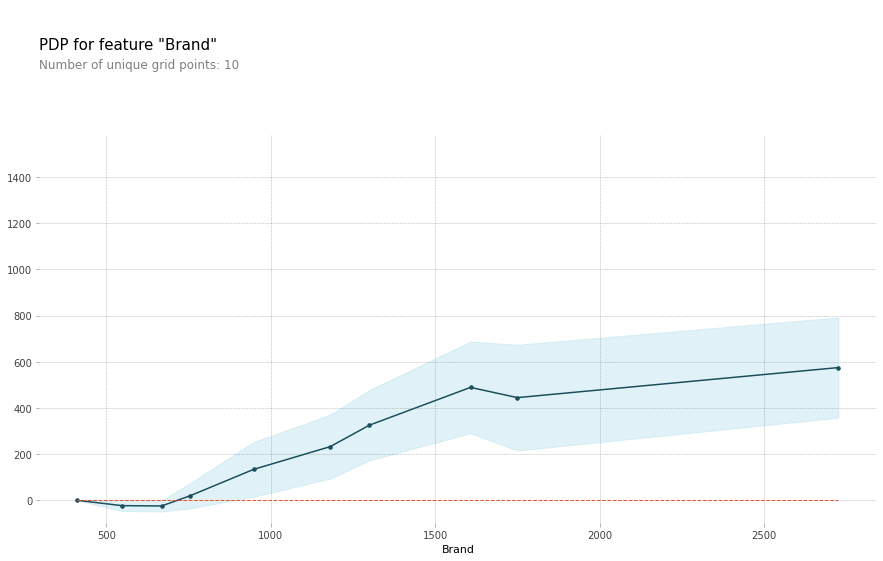

In [ ]:
feature = 'Brand'

X_trans = best_pipe.named_steps['targetencoder'].transform(X_test)

isolated = pdp_isolate(
    model=best_pipe.named_steps['xgbregressor'], 
    dataset=X_trans, 
    model_features=X_trans.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
explainer = shap.TreeExplainer(best_pipe.named_steps['xgbregressor'])
shap_values = explainer.shap_values(X_trans.iloc[:1])

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=X_test.iloc[:1]
)

In [ ]:
X_test.iloc[:1]

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Brand,Touchscreen,ScreenX,ScreenY,SSD,HDD,Hybrid,Flash
954,Lenovo,Ultrabook,14.0,Intel Core i7,8,Intel HD,Windows 10,1.7,thinkpad,0,1920,1080,256,0,0,0


In [ ]:
 y_test.iloc[:1]

954    1488.99
Name: Price_euros, dtype: float64

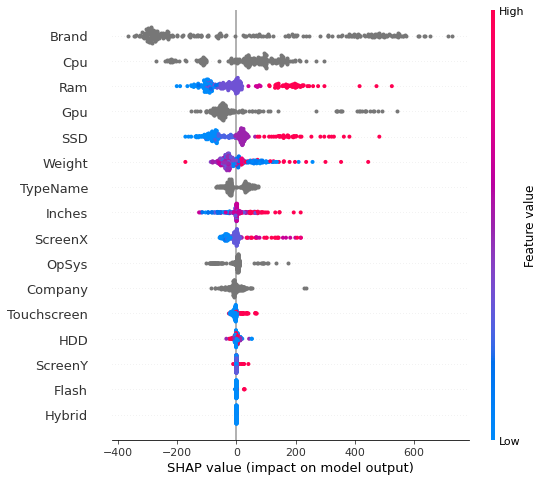

In [ ]:
shap_values = explainer.shap_values(X_trans)
shap.summary_plot(shap_values, X_test)
